# Insurance premimum
Context
The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value designated for each level.

Acknowledgements
Insurance.csv file is obtained from the Machine Learning course website (Spring 2017) from Professor Eric Suess at http://www.sci.csueastbay.edu/~esuess/stat6620/#week-6.

Inspiration
The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
insurance = pd.read_csv('C:/Users/Vikas/Downloads/Insurance_data/insurance.csv')

In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
print ("Rows     : " , insurance.shape[0])
print ("Columns  : " , insurance.shape[1])
print('\nFeatures or name of colums : \n' , insurance.columns.tolist())

print ("\nMissing values :  \n", insurance.isnull().sum()) # Validating the missing value in insurance data set
print ("\nUnique values :  \n",insurance.nunique())# Here we are looking for unique count or sub categories of data e.g 
                                                        # sex male and female and children are from 0 to 6 yrs.

Rows     :  1338
Columns  :  7

Features or name of colums : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

Missing values :  
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

Unique values :  
 age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64


In [6]:
insurance.corr() # finding correlation among the features.


,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


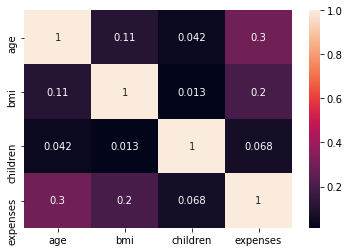

In [13]:
sns.heatmap(insurance.corr(), annot = True)
plt.show()

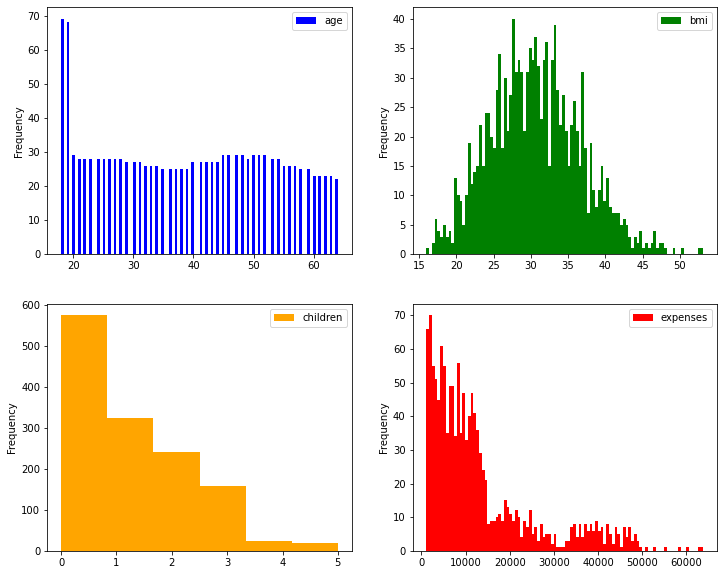

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
insurance.plot(kind="hist", y="age", bins=100, color="blue", ax=axes[0][0])
insurance.plot(kind="hist", y="bmi", bins=100, color="green", ax=axes[0][1])
insurance.plot(kind="hist", y="children", bins=6, color="orange", ax=axes[1][0])
insurance.plot(kind="hist", y="expenses", bins=100, color="red", ax=axes[1][1])
plt.show()

<AxesSubplot:>

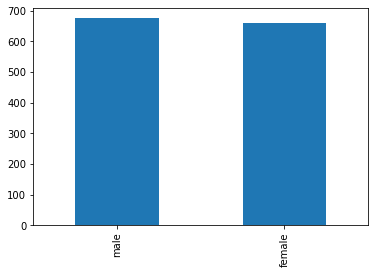

In [10]:
# histogram for sex ( Male and female)
insurance['sex'].value_counts().plot(kind="bar")

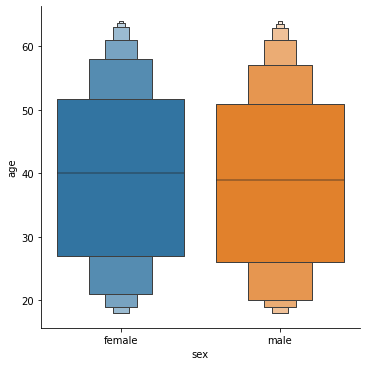

In [14]:
sns.catplot(x="sex", y="age", kind="boxen",
            data=insurance.sort_values("sex"))

<AxesSubplot:>

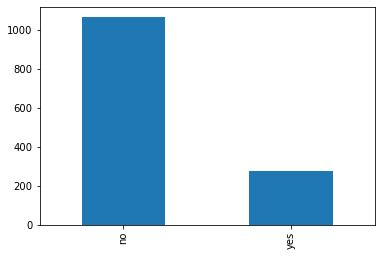

In [15]:
insurance['smoker'].value_counts().plot(kind='bar')

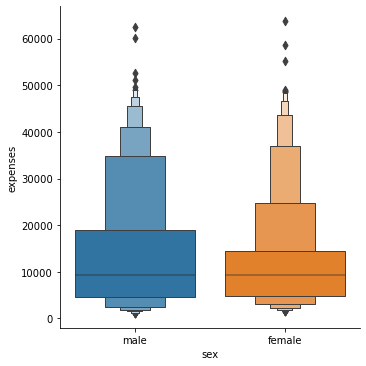

In [16]:
sns.catplot(x="sex", y="expenses", kind="boxen",
            data=insurance.sort_values("expenses"))

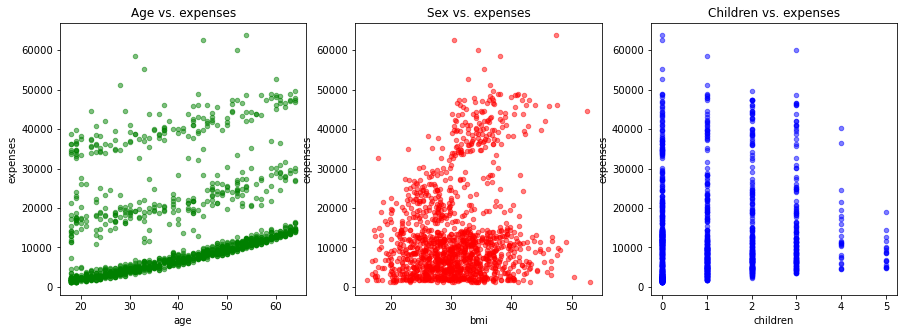

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
insurance.plot(kind='scatter', x='age', y='expenses', alpha=0.5, color='green', ax=axes[0], title="Age vs. expenses")
insurance.plot(kind='scatter', x='bmi', y='expenses', alpha=0.5, color='red', ax=axes[1], title="Sex vs. expenses")
insurance.plot(kind='scatter', x='children', y='expenses', alpha=0.5, color='blue', ax=axes[2], title="Children vs. expenses")
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

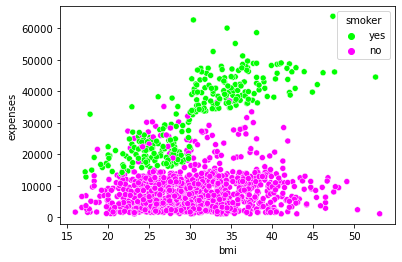

In [18]:
pal = ["lime", "magenta"]
sn.scatterplot(x="bmi", y="expenses", data=insurance, palette=pal, hue='smoker')

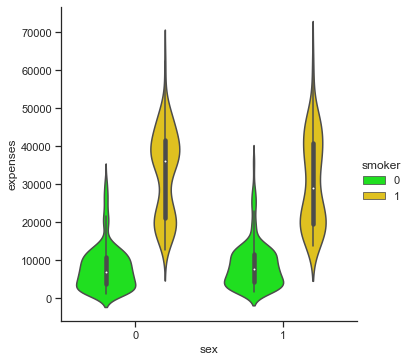

In [99]:
pal = ['lime', 'gold']
sns.catplot(x= 'sex', y = "expenses", hue = 'smoker', kind = 'violin', data =insurance, palette = pal )

Text(0.5, 1.0, 'Smokers')

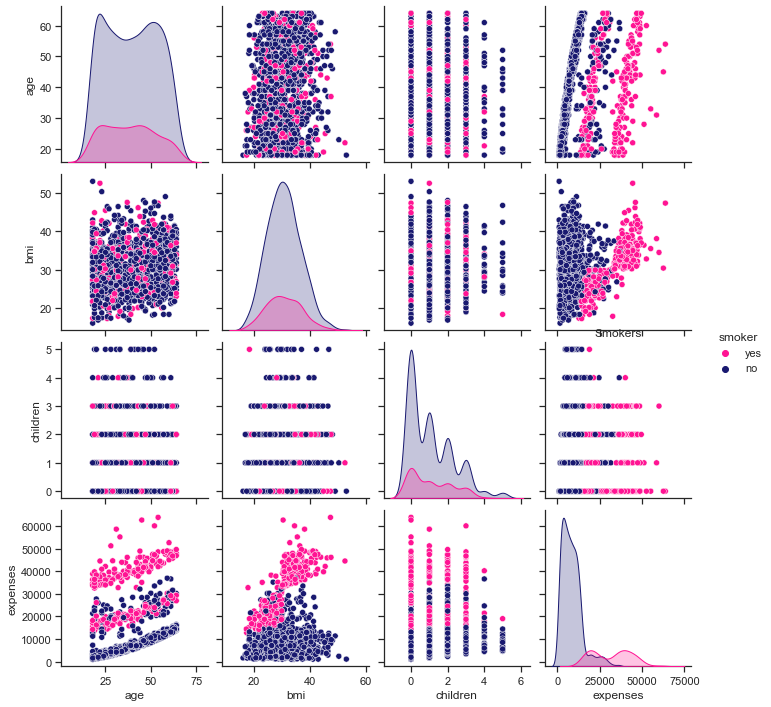

In [19]:
import seaborn as sns

sns.set(style="ticks")
pal = ["deeppink", "midnightblue"]

sns.pairplot(insurance, hue="smoker", palette=pal)
plt.title("Smokers")

In [20]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [21]:
insurance.drop(["region"], axis=1, inplace=True) 
insurance.head()

,age,sex,bmi,children,smoker,expenses
0,19,female,27.9,0,yes,16884.92
1,18,male,33.8,1,no,1725.55
2,28,male,33.0,3,no,4449.46
3,33,male,22.7,0,no,21984.47
4,32,male,28.9,0,no,3866.86


In [22]:
# Changing binary categories to 1s and 0s
insurance['sex'] = insurance['sex'].map(lambda s :1  if s == 'female' else 0)
insurance['smoker'] = insurance['smoker'].map(lambda s :1  if s == 'yes' else 0)

insurance.head()

,age,sex,bmi,children,smoker,expenses
0,19,1,27.9,0,1,16884.92
1,18,0,33.8,1,0,1725.55
2,28,0,33.0,3,0,4449.46
3,33,0,22.7,0,0,21984.47
4,32,0,28.9,0,0,3866.86


In [23]:
X = insurance.drop(['expenses'], axis = 1)
y = insurance.expenses

# Model building 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

0.7952529674123328


Score is the R2 score, which varies between 0 and 100%. It is closely related to the MSE but not the same.

Wikipedia defines r2 like this, ” … is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).” Another definition is “(total variance explained by model) / total variance.” So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases.

In [25]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results

,Actual,Predicted
578,9724.53,11456.260710
610,8547.69,9934.793123
569,45702.02,37778.385938
1034,12950.07,15858.505279
198,9644.25,6953.500191
...,...,...
574,13224.06,14430.265988
1174,4433.92,6701.983467
1327,9377.90,11141.700468
817,3597.60,7201.002180


In [26]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,-0.514853,0.985155,-0.180051,-0.063607,-0.503736
1,1.548746,0.985155,-1.399832,-0.892144,-0.503736
2,-1.439915,-1.015069,-0.982538,-0.063607,-0.503736
3,-1.368757,0.985155,-1.014638,-0.892144,1.985167
4,-0.941805,0.985155,-1.367732,-0.892144,-0.503736


In [75]:
pd.DataFrame(y_train).head()

,expenses
1075,4562.84
131,13616.36
15,1837.24
1223,26125.67
1137,3176.29


In [28]:
from sklearn.linear_model import LinearRegression  # Import Linear Regression model

multiple_linear_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
multiple_linear_reg.fit(X_train, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

In [29]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)  # Create a PolynomialFeatures instance in degree 3
x_train_poly = polynomial_features.fit_transform(X_train)  # Fit and transform the training data to polynomial
x_test_poly = polynomial_features.fit_transform(X_test)  # Fit and transform the testing data to polynomial

polynomial_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
polynomial_reg.fit(x_train_poly, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

In [30]:
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regression model

decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  # Create a instance for Decision Tree Regression model
decision_tree_reg.fit(X_train, y_train)  # Fit data to the model

DecisionTreeRegressor(max_depth=5, random_state=13)

In [31]:
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regression model

random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  # Create a instance for Random Forest Regression model
random_forest_reg.fit(X_train, y_train)  # Fit data to the model

RandomForestRegressor(max_depth=5, n_estimators=400, random_state=13)

NOTE: n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

In [32]:
from sklearn.svm import SVR  # Import SVR model

support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000)  # Create a instance for Support Vector Regression model
support_vector_reg.fit(X_train, y_train)  # Fit data to the model

SVR(C=1000, gamma='auto', kernel='linear')

In [33]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

Evaluating Multiple Linear Regression Model

In [34]:
# Prediction with training dataset:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_MLR_test = multiple_linear_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR)

Training Accuracy for Multiple Linear Regression Model:  -0.48955318862091035
Testing Accuracy for Multiple Linear Regression Model:  -0.32407582691782677
RMSE for Training Data:  14589.270271020132
RMSE for Testing Data:  14437.97885483326
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  0.7171146284201497


Evaluating Polynomial Regression Model

In [35]:
# Prediction with training dataset:
y_pred_PR_train = polynomial_reg.predict(x_train_poly)

# Prediction with testing dataset:
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

# Find training accuracy for this model:
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy for Polynomial Regression Model: ", accuracy_PR_train)

# Find testing accuracy for this model:
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy for Polynomial Regression Model: ", accuracy_PR_test)

# Find RMSE for training data:
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

# Find RMSE for testing data:
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 10-Fold Cross Predicted Polynomial Regression Model: ", accuracy_cv_PR)

Training Accuracy for Polynomial Regression Model:  0.8355789214701362
Testing Accuracy for Polynomial Regression Model:  0.880945411305889
RMSE for Training Data:  4847.125990188415
RMSE for Testing Data:  4329.3534424717955
Accuracy for 10-Fold Cross Predicted Polynomial Regression Model:  0.8391989111091944


###  Evaluating Decision Tree Regression Model

In [36]:
# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.8694256881440832
Testing Accuracy for Decision Tree Regression Model:  0.8711939744446933
RMSE for Training Data:  4319.509514116047
RMSE for Testing Data:  4503.167101749359
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8494909129273351


Evaluating Random Forest Regression Model

In [37]:
# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for Random Forest Regression Model:  0.878251099532176
Testing Accuracy for Random Forest Regression Model:  0.8969203533577584
RMSE for Training Data:  4170.979793736701
RMSE for Testing Data:  4028.43567685455
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.8573765551768575


Evaluating Support Vector Regression Model

In [38]:
# Prediction with training dataset:
y_pred_SVR_train = support_vector_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = support_vector_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Support Vector Regression Model: ", accuracy_SVR_train)

# Find testing accuracy for this model:
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Support Vector Regression Model: ", accuracy_SVR_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_SVR = cross_val_predict(support_vector_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_SVR = r2_score(y, y_pred_cv_SVR)
print("Accuracy for 10-Fold Cross Predicted Support Vector Regression Model: ", accuracy_cv_SVR)

Training Accuracy for Support Vector Regression Model:  0.652232923332688
Testing Accuracy for Support Vector Regression Model:  0.7343309955103848
RMSE for Training Data:  7049.361696268942
RMSE for Testing Data:  6467.26143175293
Accuracy for 10-Fold Cross Predicted Support Vector Regression Model:  0.7058185956244919


In [39]:
# Compare all results in one table
training_accuracies = [accuracy_MLR_train, accuracy_PR_train, accuracy_DTR_train, accuracy_RFR_train, accuracy_SVR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_PR_test, accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test]
training_RMSE = [RMSE_MLR_train, RMSE_PR_train, RMSE_DTR_train, RMSE_RFR_train, RMSE_SVR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_PR_test, RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_PR, accuracy_cv_DTR, accuracy_cv_RFR, accuracy_cv_SVR]

parameters = ["fit_intercept=False", "fit_intercept=False", "max_depth=5", "n_estimators=400, max_depth=5", "kernel=”linear”, C=1000"]

table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Random Forest Regression", "Support Vector Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Multiple Linear Regression,fit_intercept=False,-0.489553,-0.324076,14589.270271,14437.978855,0.717115
Polynomial Regression,fit_intercept=False,0.835579,0.880945,4847.125990,4329.353442,0.839199
Decision Tree Regression,max_depth=5,0.869426,0.871194,4319.509514,4503.167102,0.849491
Random Forest Regression,"n_estimators=400, max_depth=5",0.878251,0.896920,4170.979794,4028.435677,0.857377
Support Vector Regression,"kernel=”linear”, C=1000",0.652233,0.734331,7049.361696,6467.261432,0.705819


Our best classifier is our Random Forests using 400 estimators and a max_depth of 5
R^2 (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

Let's test our best regression on some new data

In [40]:
input_data = {'age': [35],
              'sex': ['male'],
              'bmi': [26],
              'children': [0],
              'smoker': ['no'],
              'region': ['southeast']}

input_data = pd.DataFrame(input_data)
input_data

,age,sex,bmi,children,smoker,region
0,35,male,26,0,no,southeast


In [41]:
# Our simple pre-processing 
input_data.drop(["region"], axis=1, inplace=True) 
input_data['sex'] = input_data['sex'].map(lambda s :1  if s == 'female' else 0)
input_data['smoker'] = input_data['smoker'].map(lambda s :1  if s == 'yes' else 0)
input_data

,age,sex,bmi,children,smoker
0,35,0,26,0,0


In [42]:
# Scale our input data  
input_data = sc.transform(input_data)
input_data

array([[-0.30137763, -1.01506865, -0.75784204, -0.89214407, -0.50373604]])

In [43]:
# Reshape our input data in the format required by sklearn models
input_data = input_data.reshape(1, -1)
print(input_data.shape)
input_data

(1, 5)


array([[-0.30137763, -1.01506865, -0.75784204, -0.89214407, -0.50373604]])

In [44]:
# Get our predicted insurance rate for our new customer
random_forest_reg.predict(input_data)

array([5974.10958999])

In [45]:
# Note Standard Scaler remembers your inputs so you can use it still here
print(sc.mean_)
print(sc.scale_)

[39.23529412  0.50747757 30.7218345   1.07676969  0.20239282]
[14.05311355  0.49994408  6.23063155  1.20694597  0.40178348]
